# Preface

The objective of this notebook is to provide detailed visual and descriptive overiew of the dataset as well as prepare for  Machine Learning modelling.Comments are added to each output in a form of explanation/key insights.

# Data information and requirements

The dataset contains 166 observations of  anthropometric measurements and blood analysis indicators of women being tested for detecting breast cancer.Each row represents   a distinct patient observation.The data is  obtained from an open access journal website for cancer research (reference:https://www.biomedcentral.com/).There is a total of 9 features and 1 target variable which are described below:

* Age - age of the patient
* BMI - a proportion of the weight (kg) and the squared height(m)
* Glucose- an important energy source and a component of many carbohydrates.Measure unit: mmol/L (millimoles per litre)
* Insulin- a  pancreas produced hormone which regulates the amount of glucose in the blood.Measure unit : Insulin Units – 100 IU – 1 ml.
* Resistin –  known as Adipose tissue-specific secretory factor (ADSF) – specific cysteine-rich peptide hormone derived from adipose tissue.
* Adiponectin – a protein hormone which regulates the glucose levels.
* MCP – small cytokine that recruits monocytes, dendritic cells to the inflammation sites that are produced by tissue injury/infection.
* HOMA – indicator of insulin resistance


The target variable has two values(1,2).1 indicates that the patient is diseased and 2 indicates the patient is healthy.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler as sc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from scipy.stats import shapiro
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib import pyplot
from sklearn.model_selection import KFold
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


# Data info

In [2]:
breast_cancer=pd.read_excel('dataR2.xlsx')

In [3]:
breast_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


It is worth to mention that there are no missing values.

In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


The descriptive statistics per variable give meaningful overview of  how the values are distributed.The min,max and mean values are important if we don't have specific knowledge for some variable scale.

In [5]:
breast_cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


# Data exploration

### Overview of target variable (# of patients per category)

The target variable which will be predicted as already mentioned can take two values.Let's see how many patients there are per category: 

In [6]:
disease_group=breast_cancer.groupby('Classification').size()
disease_group=disease_group.to_frame()
disease_group=disease_group.reset_index()


In [7]:
disease_group.rename(columns = {0:'count_per_category'}, inplace = True)

In [8]:
disease_group

,Classification,count_per_category
0,1,52
1,2,64


In [9]:
#window function would be useful here,but seems like they are not that powerful in Python
breast_cancer=breast_cancer.merge(disease_group,on='Classification')

In [10]:
breast_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,52
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,52
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,52
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,52
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,52
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,64
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,64
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,64
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,64


Creating additional Classification categorical variable (with purpose to ease the visualization)

In [11]:
breast_cancer['Classification_cat']=breast_cancer['Classification']

In [12]:
breast_cancer['Classification_cat'].replace({1:"healthy",2:"disease"},inplace=True)

Text(0.5, 1.0, 'Amount of patients per category')

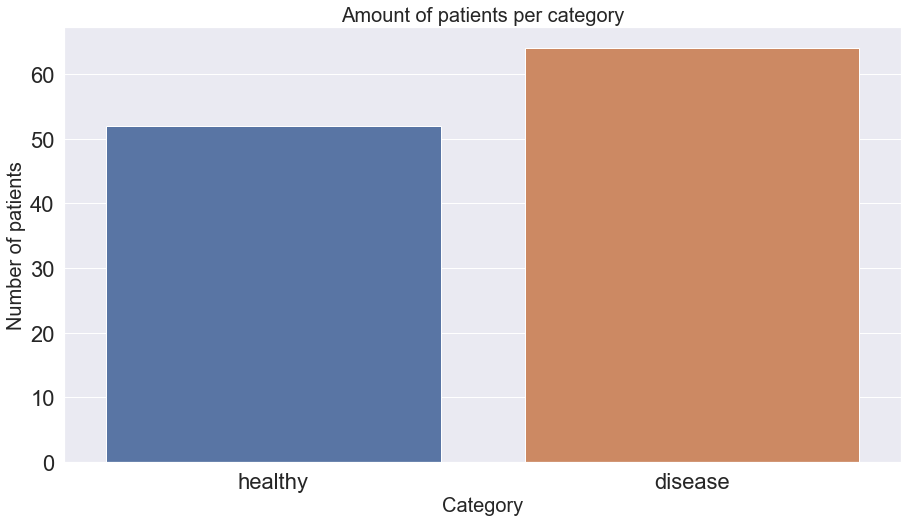

In [13]:
#viusalise count
sns.set(rc = {'figure.figsize':(15,8)},font_scale=2)
ax = sns.barplot(x="Classification_cat",y="count_per_category", data=breast_cancer)
ax.set_xlabel('Category',fontsize = 20)
ax.set_ylabel('Number of patients',fontsize = 20)
ax.set_title('Amount of patients per category',fontsize = 20)

### Exploring  the anthropometric measurements (BMI)

Creating variable that will categorise the patients by their BMI:

In [14]:
breast_cancer['BMI_status'] = 'zzz'
breast_cancer.loc[(breast_cancer['BMI']>16) & (breast_cancer['BMI']<18.5),'BMI_status'] = 'Weak'
breast_cancer.loc[(breast_cancer['BMI']>18.5) & (breast_cancer['BMI']<24.9),'BMI_status'] ='Normal'
breast_cancer.loc[(breast_cancer['BMI']>25) & (breast_cancer['BMI']<29.9),'BMI_status'] = 'Overweight'
breast_cancer.loc[(breast_cancer['BMI']>30) & (breast_cancer['BMI']<34.9),'BMI_status'] = 'Obesity'
breast_cancer.loc[(breast_cancer['BMI']>34.9),'BMI_status'] = 'Extreme obesity'


In [15]:
count=breast_cancer.groupby(['BMI_status', 'Classification']).size()
count=count.reset_index()


In [16]:
count.rename(columns = {0:'count'}, inplace = True)

In [17]:
count

,BMI_status,Classification,count
0,Extreme obesity,1,9
1,Extreme obesity,2,3
2,Normal,1,17
3,Normal,2,22
4,Obesity,1,12
5,Obesity,2,15
6,Overweight,1,14
7,Overweight,2,23
8,Weak,2,1


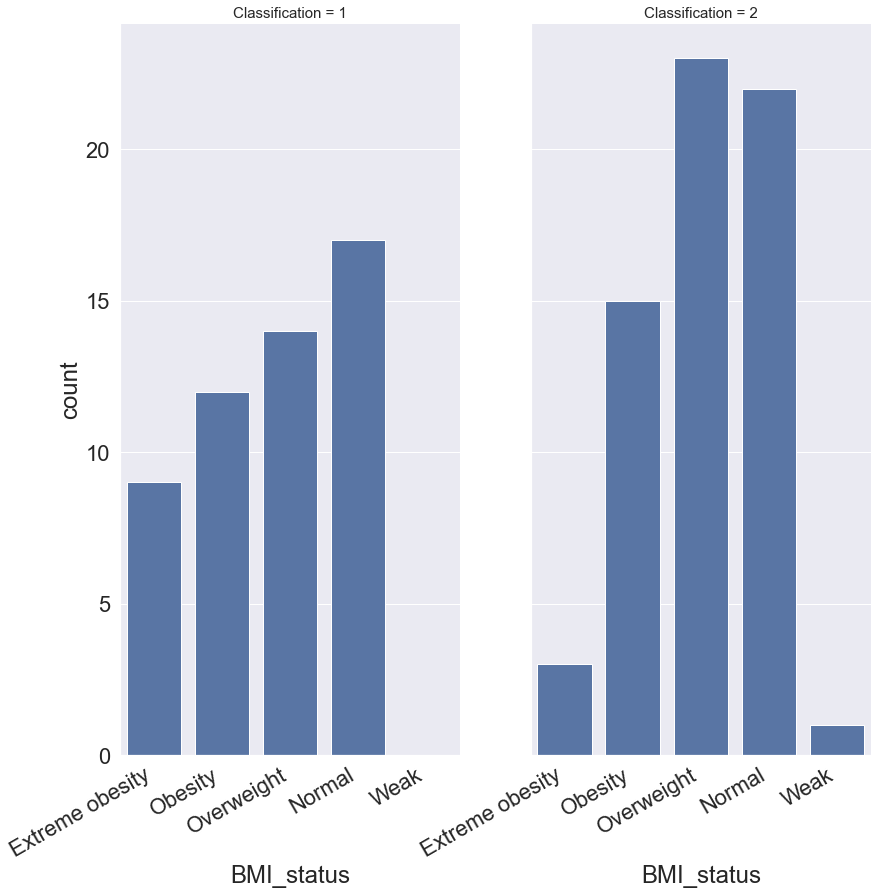

In [18]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=2)
g=sns.FacetGrid(count, col='Classification', height=12, aspect=.5)
g.map(sns.barplot,'BMI_status','count',order=['Extreme obesity','Obesity','Overweight','Normal','Weak'])
g.set_titles(size=15)
g.set_xticklabels(rotation=30, horizontalalignment='right')


More healthy people  are categorised as 'Overweight',whereas the BMI status of diseased people (Category=1) is Normal,which means that Obesity is not an influence factor here.

# Data preparation

### Comparison of the univariate analysis per category.Checking for multicollinearity using Variance Inflation Factor.

The following  univariate overview will provide information of how the measurements are distributed per category with the goal to see if there is significant difference between the variable values for each category.The goal of doing this:
* checking the significancy of each variable and forming hypothesis
* dropping the insignificant variables who doesn't represent the variance in the dataset or they exhibit multicollinearity  with other variables is cruicalIn this case,the null hypothesis would be:
* The variables are statistically significant and represent the variance in the data and they don't exhibit any multicollinearity.
To reject the null hypothesis,the statistic tool applied is The Variance Inflation Factor (VIF) -  a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variance of a single beta if it were fit alone.

Let's first explore the univariate overview per category.

In [19]:
breast_cancer[breast_cancer['Classification']==1].describe()
#titanic[titanic["Age"] > 35

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0
mean,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692,1.0,52.0
std,18.957999,5.427465,10.191529,4.859793,1.218256,19.334699,7.631281,11.447053,292.242157,0.0,0.0
min,24.000000,18.670000,60.000000,2.707000,0.467409,4.311000,2.194280,3.291750,45.843000,1.0,52.0
25%,41.750000,23.096003,82.750000,4.304000,0.879510,11.845750,5.454286,6.597523,260.736500,1.0,52.0
50%,65.000000,27.694389,87.000000,5.483500,1.139683,21.494850,8.127775,8.929190,471.322500,1.0,52.0
75%,75.000000,32.328091,93.250000,7.001000,1.774561,36.721600,10.820219,12.808525,642.933500,1.0,52.0
max,89.000000,38.578759,118.000000,26.211000,7.111918,83.482100,38.040000,82.100000,1256.083000,1.0,52.0


In [20]:
breast_cancer[breast_cancer['Classification']==2].describe()
#titanic[titanic["Age"] > 35

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category
count,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.0
mean,56.671875,26.984740,105.56250,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500,2.0,64.0
std,13.493155,4.620398,26.55744,12.317738,4.588943,19.212451,6.189466,12.636979,384.001622,0.0,0.0
min,34.000000,18.370000,70.00000,2.432000,0.507936,6.333900,1.656020,3.210000,90.090000,2.0,64.0
25%,45.000000,22.788722,92.00000,4.406000,1.036842,12.402925,5.484117,8.113675,299.188250,2.0,64.0
50%,53.000000,27.408027,98.50000,7.580000,2.052256,18.877650,8.446438,14.371825,465.374000,2.0,64.0
75%,68.000000,30.810069,109.00000,16.063000,4.461312,37.378300,12.254740,22.965170,737.762500,2.0,64.0
max,86.000000,37.109375,201.00000,58.460000,25.050342,90.280000,33.750000,55.215300,1698.440000,2.0,64.0


Key insights:

*There is no significant difference between the mean  Age and BMI between categories
*The  mean glucose level for healthy people is ~20% lower than the one of the diseased.
*A nearly 50% increase in the average Insulin levels for diseased can be noticed
*Mean Resistin level is also higher for diseased people
*There is no significant difference between the mean of Leptin and Adiponectin between categories

From this overview it is possible to claim that the Age and BMI are not statistically significant,but further confirmation is required.


In [21]:
X_vif=breast_cancer.iloc[:,:9]
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X_vif.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))] 
  
display(vif_scores)

,Attribute,VIF Scores
0,Age,13.174889
1,BMI,40.738293
2,Glucose,39.585326
3,Insulin,21.154744
4,HOMA,22.665524
5,Leptin,5.042565
6,Adiponectin,3.150224
7,Resistin,3.216120
8,MCP.1,4.777762


As it is seen,the BMI and the Glucose variables have the highest VIF Scores.Let's check their correlated relationship with other variables:

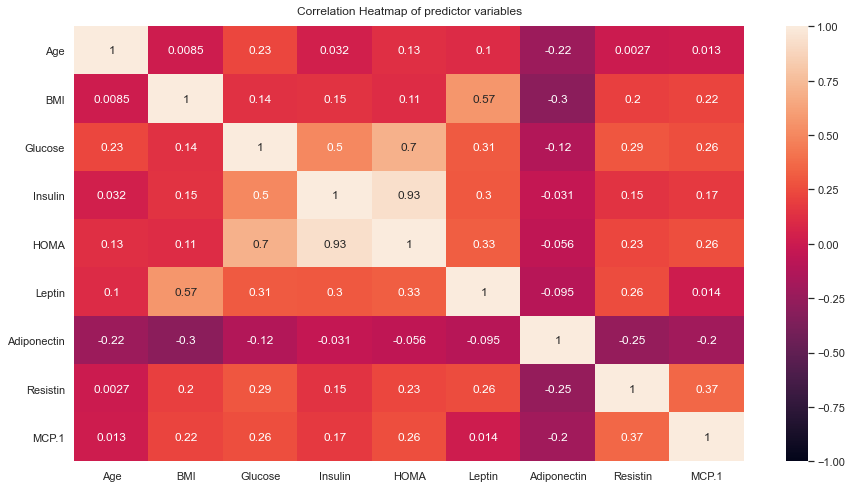

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
heatmap = sns.heatmap(breast_cancer.iloc[:,:9].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of predictor variables', fontdict={'fontsize':12}, pad=12);

Key insights:
* Glucose  has the highest correlation with Leptin.This is what I have found after doing a small reserach about their relationship:

"Circulating plasma insulin and glucose levels are thought to be major regulators of leptin secretion.Glucose metabolism rather than insulin alone is a main determinant of leptin expression." (abstract:https://academic.oup.com/jcem/article/85/3/1267/2660753)

* BMI has nearly the same VIF score as Glucose.

BMI also has high correlation with Leptin probably because Leptin is the main regulator of body weight and the main element to estimate BMI is  body weight itself.
Furhtermore,HOMA and Insulin are also correlated with Glucose. 
Let's drop BMI and Glucose variables and see how the VIF scores will change.



In [23]:
cancer2=breast_cancer.copy()

In [24]:
breast_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category,Classification_cat,BMI_status
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,52,healthy,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,52,healthy,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,52,healthy,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,52,healthy,Normal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,52,healthy,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,64,disease,Overweight
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,64,disease,Overweight
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,64,disease,Obesity
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,64,disease,Overweight


In [25]:
X_vif2=X_vif.drop(['BMI','Glucose'],axis=1)
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X_vif2.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X_vif2.values, i) for i in range(len(X_vif2.columns))] 
  
display(vif_scores)

,Attribute,VIF Scores
0,Age,5.633412
1,Insulin,14.249439
2,HOMA,11.794633
3,Leptin,3.417510
4,Adiponectin,2.599688
5,Resistin,3.046963
6,MCP.1,3.802299


The VIF scores for the remained variables decreased significantly.Insulin and HOMA still has noticeably higher scores,but not to a concerning extent.
We can drop this columns from the dataset:

In [26]:
cancer2=cancer2.drop(['BMI','Glucose'],axis=1)

In [27]:
cancer2=cancer2.drop(['BMI_status'],axis=1)

In [28]:
breast_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category,Classification_cat,BMI_status
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,52,healthy,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,52,healthy,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,52,healthy,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,52,healthy,Normal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,52,healthy,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,64,disease,Overweight
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,64,disease,Overweight
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,64,disease,Obesity
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,64,disease,Overweight


Which results in a final prepared dataset:

In [29]:
cancer2

,Age,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category,Classification_cat
0,48,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,52,healthy
1,83,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,52,healthy
2,82,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,52,healthy
3,68,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,52,healthy
4,86,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,52,healthy
...,...,...,...,...,...,...,...,...,...,...
111,45,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,64,disease
112,62,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,64,disease
113,65,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,64,disease
114,72,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,64,disease


### Determine data distribution

The below histogram visualization aims to confirm the assumption that the data doesn't have Gaussian (Normal) distribution.This is nesssecary to determine what kind of statistical test should be used for deriving the correlation coefficients.If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used,such as kendall rank correlation.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Glucose'}>],
       [<AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'HOMA'}>,
        <AxesSubplot:title={'center':'Leptin'}>],
       [<AxesSubplot:title={'center':'Adiponectin'}>,
        <AxesSubplot:title={'center':'Resistin'}>,
        <AxesSubplot:title={'center':'MCP.1'}>]], dtype=object)

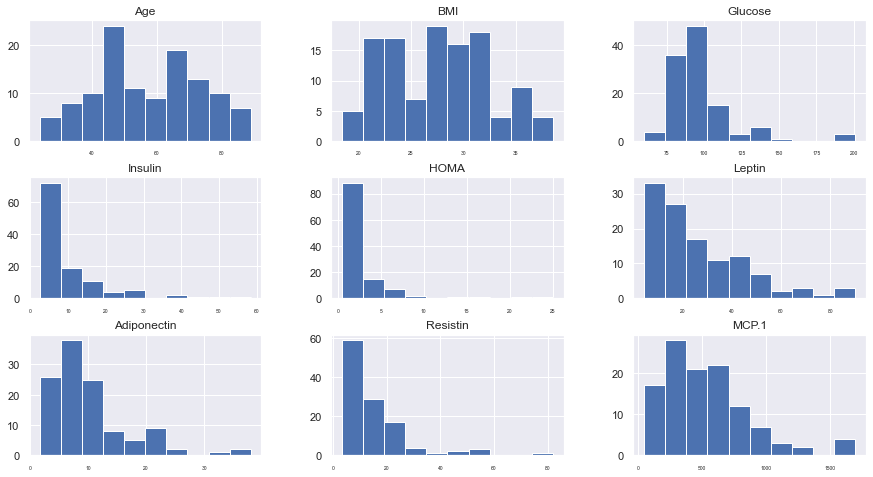

In [30]:
breast_cancer.iloc[:,:9].hist(xlabelsize=5)

A statistical test to confirm the data sample is not drawn from Gaussian distribution using p-value:
(higher the p-value,higher the chance is the data is Gaussian distributed)

In [31]:
stat, p = shapiro(breast_cancer.iloc[:,:9])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.442, p=0.000
Sample does not look Gaussian (reject H0)


This graphical method confirms the data is not normally distributed and we can proceed to using the Kendall correlation test:

<AxesSubplot:>

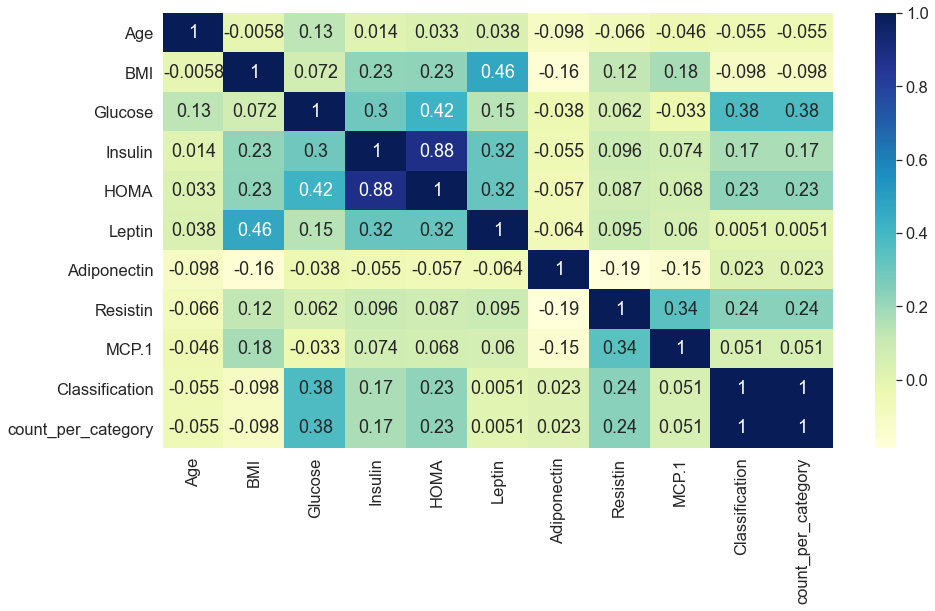

In [32]:
corr=breast_cancer.corr(method='kendall')

sns.set(rc = {'figure.figsize':(15,8)},font_scale=1.5)
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

As it is visible from the above heatmap visualization,the variables that least correlate with the target variable are BMI,Age,Adiponectin,Leptin and MCP.1.Therefore,they can be dropped.

In [33]:
breast_cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,count_per_category,Classification_cat,BMI_status
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,52,healthy,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,52,healthy,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,52,healthy,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,52,healthy,Normal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,52,healthy,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,64,disease,Overweight
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,64,disease,Overweight
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,64,disease,Obesity
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,64,disease,Overweight


In [34]:
cancer=breast_cancer.copy()

In [35]:
cancer=cancer.drop(['Age','BMI','Leptin','Adiponectin','MCP.1','count_per_category','Classification_cat','BMI_status'],axis=1)

In [36]:
cancer

,Glucose,Insulin,HOMA,Resistin,Classification
0,70,2.707,0.467409,7.99585,1
1,92,3.115,0.706897,4.06405,1
2,91,4.498,1.009651,9.27715,1
3,77,3.226,0.612725,12.76600,1
4,92,3.549,0.805386,10.57635,1
...,...,...,...,...,...
111,92,3.330,0.755688,10.96000,2
112,100,4.530,1.117400,7.32000,2
113,97,5.730,1.370998,10.33000,2
114,82,2.820,0.570392,3.27000,2


### Exploring  further the relationship between variables using Logistic Regression

There is a lot of similarities between Logistic and Linear Regression.In the case of Linear Regression,the output that has to be predicted (the y-value) can take continuous values.Although this is not the case when it comes to Logistic Regression.This type of regression aims to predict probabilities.Hence,the y-scale is 0-1 and it corresponds to the probability of a certain observation happening/not happening.The probabilities has to be transformed to log odds  using the logit function.A visualization is included below to demonstrate this concept:

Transforming the Classification variable  to be in a binary format:

In [37]:
cancer.loc[breast_cancer["Classification"]==1, "Classification_binary"]=0 
cancer.loc[breast_cancer["Classification"]==2, "Classification_binary"]=1

In [38]:
cancer['Classification_binary']=cancer['Classification_binary'].astype(int)

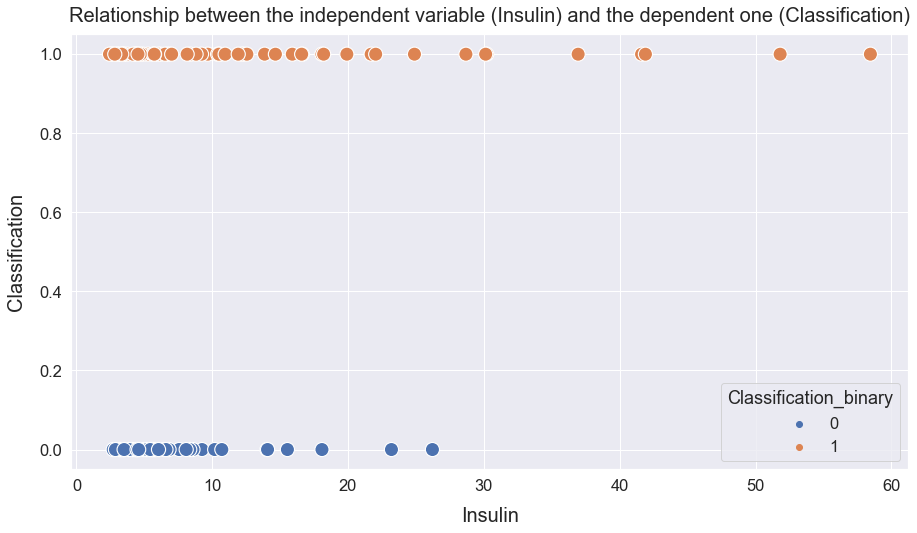

In [39]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Insulin', y='Classification_binary', hue='Classification_binary', data=cancer, s=200)
plt.title("Relationship between the independent variable (Insulin) and the dependent one (Classification)", y=1.015, fontsize=20)
plt.xlabel("Insulin", labelpad=13,fontsize = 20)
plt.ylabel("Classification", labelpad=13,fontsize = 20)
ax = plt.gca()


The scatterplot shows how the Glucose variable (doesn't matter which independent variable is chosen,I chose this one) relates to the dependent variable.For example,from that visualization we can derive that patients with Glucose level of 50 are classified as 'Diseased' and the ones with 25 are classified as 'Healthy'.ALthough this scatterplot gives good sense,it is still not a Logistic Regression visualization.To make a logistic curve,a LogisticRegression() model will be fitted into the data and visualized.

In [40]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [41]:
X_ins=cancer['Insulin'].values.reshape(-1, 1)

In [42]:
X_ins

array([[ 2.707],
       [ 3.115],
       [ 4.498],
       [ 3.226],
       [ 3.549],
       [ 3.226],
       [ 4.69 ],
       [ 6.47 ],
       [ 3.35 ],
       [ 4.952],
       [ 3.469],
       [ 5.663],
       [ 4.09 ],
       [ 6.107],
       [ 5.782],
       [ 7.553],
       [ 2.869],
       [18.077],
       [ 4.427],
       [14.026],
       [ 4.345],
       [ 4.53 ],
       [ 5.81 ],
       [ 4.376],
       [ 5.537],
       [ 6.76 ],
       [ 6.703],
       [ 9.245],
       [ 6.817],
       [ 6.59 ],
       [15.533],
       [10.175],
       [ 8.576],
       [23.194],
       [ 3.855],
       [ 5.819],
       [ 4.181],
       [ 5.646],
       [ 5.138],
       [ 3.881],
       [ 5.376],
       [14.07 ],
       [ 5.197],
       [ 5.43 ],
       [ 8.34 ],
       [ 6.042],
       [ 8.079],
       [ 3.508],
       [10.704],
       [ 4.462],
       [26.211],
       [ 4.58 ],
       [13.852],
       [ 4.56 ],
       [12.305],
       [21.699],
       [ 2.999],
       [ 6.2  ],
       [ 4.364

In [43]:
scaler=sc()
X_transformed = scaler.fit_transform(X_ins)

In [44]:
y=cancer.iloc[:,5].to_numpy()
model.fit(X_transformed,y)

LogisticRegression(random_state=0, solver='liblinear')

Extracting the predicted probabilities from the Logistic Function:

In [45]:
X_probability_class_1 =model.predict_proba(X_transformed)[:, 1]
X_probability_class_1

array([0.42899929, 0.43663294, 0.46271191, 0.43871511, 0.44478606,
       0.43871511, 0.46635192, 0.50021774, 0.44104368, 0.47132473,
       0.44328081, 0.48484552, 0.45499054, 0.49330141, 0.4871112 ,
       0.52084153, 0.43202646, 0.70796617, 0.46136685, 0.64032381,
       0.4598141 , 0.46331831, 0.48764438, 0.46040102, 0.48244724,
       0.50574325, 0.50465727, 0.55289492, 0.50682918, 0.50250424,
       0.66632932, 0.57034443, 0.54025888, 0.78168813, 0.45055275,
       0.48781577, 0.45671097, 0.4845219 , 0.47485856, 0.45104337,
       0.47938397, 0.64109581, 0.47598005, 0.48041124, 0.53578809,
       0.49206314, 0.53083702, 0.44401449, 0.5801954 , 0.46202984,
       0.81839026, 0.46426603, 0.63726384, 0.46388691, 0.60959251,
       0.76162081, 0.43445937, 0.49507323, 0.46017382, 0.44352534,
       0.47719685, 0.50427622, 0.42774884, 0.42961551, 0.50768645,
       0.47037525, 0.44819538, 0.48554991, 0.44235935, 0.67235134,
       0.44273541, 0.98135608, 0.49183455, 0.46123427, 0.91078

In [46]:
predictions = {"Insulin": X_transformed.flatten(),
                 "probability_class1": X_probability_class_1}
df_predictions = pd.DataFrame(predictions)
df_predictions

,Insulin,probability_class1
0,-0.728739,0.428999
1,-0.688038,0.436633
2,-0.550073,0.462712
3,-0.676965,0.438715
4,-0.644743,0.444786
...,...,...
111,-0.666590,0.440668
112,-0.546881,0.463318
113,-0.427172,0.486121
114,-0.717467,0.431110


The final visualization has a logistic curve fitted to the observations.The log odds  is calculated using the logit function on the y-axis for each observation.

<Figure size 1080x576 with 0 Axes>

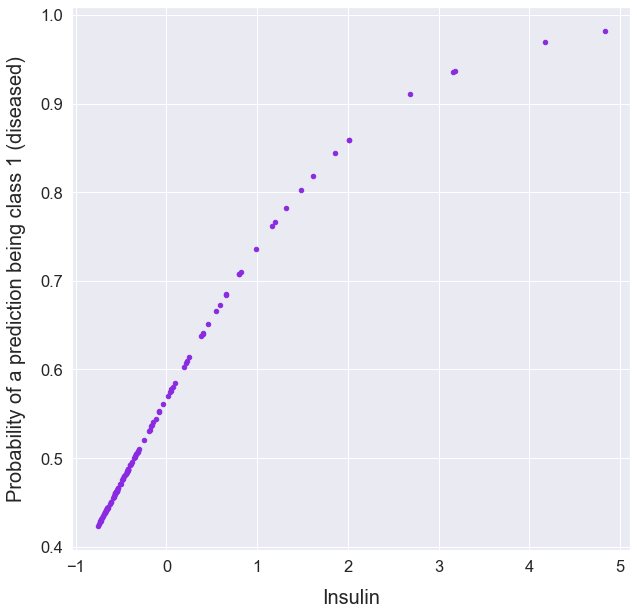

In [47]:
plt.figure(figsize=(15, 8))
ax = df_predictions.plot.scatter(x="Insulin", y="probability_class1", figsize=(10, 10), c='blueviolet')
plt.xlabel("Insulin", labelpad=14,fontsize = 20)
plt.ylabel("Probability of a prediction being class 1 (diseased)", labelpad=14,fontsize = 20);


In [48]:
model.intercept_

array([0.27083967])

This can be achieved by defining the formula itself in a custom function.

In [49]:
def log_reg_model_predict(insulin):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * insulin)))

Text(0, 0.5, 'Probability of a prediction being class 1 (diseased)')

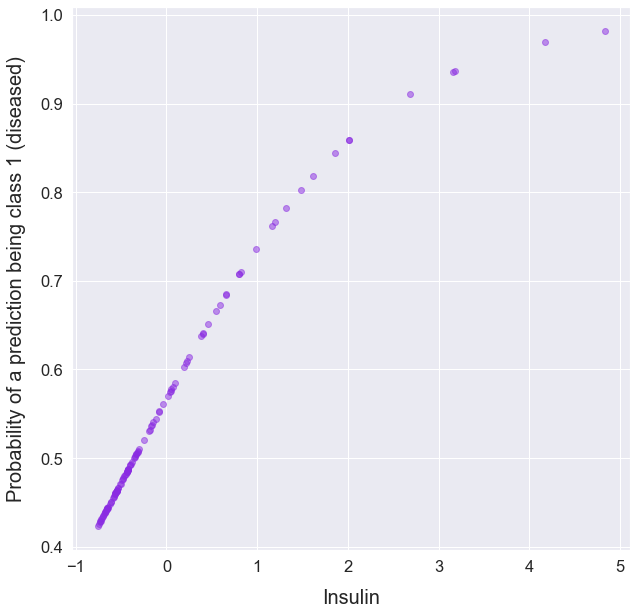

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(x=X_transformed, y=log_reg_model_predict(X_transformed), c='blueviolet', alpha=0.5)
plt.xlabel("Insulin", labelpad=14,fontsize = 20)
plt.ylabel("Probability of a prediction being class 1 (diseased)", labelpad=14,fontsize = 20)

### Clustering analysis using K-Means clustering - are there clusters in the data?

The goal of this section is to perform clustering analysis on the features so that additional insights of the feature space is provided.Typically,clustering algorithms are applied in a context of unsupervised learning task,but they can also be applicable to explore any clusters in the datasets if with the help of visualization.An additional technique,dimensionality reduction,will be used for creating 2-dimensional feature dataset.Dimensionality reduction refers to techniques of decreasing the number of variables in the dataset.Mainly,it is applicable to ease the ML execution.In this case,it will be used to decrease the volume of the data that will be clustered.The method of applying this technique is PCA (Principal Component Analysis).Principal component analysis (PCA) involves a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components.
Before starting with any execution,the data should be pre-processed.Scaling will be used to achieve this goal.The reason for  performing pre-processing is related to how the PCA function will analyse the values of the variables.Since the variables are not sharing the same scale,some of them might have larger variation and since the goal of the PCA is to  maximize the variance per variable,the result will be that some of the variables will be assigned with more importance than others,which is not the end goal and will lead to misleading results.

Standardizing data:

In [51]:
Y =cancer['Classification']
X =cancer.iloc[:,:-2]
columns = X.columns
scaler = sc()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
X_std.head()

,Glucose,Insulin,HOMA,Resistin
0,-1.239222,-0.728739,-0.614282,-0.545517
1,-0.258299,-0.688038,-0.548240,-0.864214
2,-0.302887,-0.550073,-0.464752,-0.441660
3,-0.927110,-0.676965,-0.574210,-0.158867
4,-0.258299,-0.644743,-0.521081,-0.336352


In [52]:
#extracting the features from the standardised dataset
features = list(X_std.columns)[:-1]

###creating feature dataset (with the purpose of not working directly on the original standardised one)
data = X_std[features]

In [53]:
#creating 2 clusters (the number of clusters is randomly chosen)
clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

The data is already clustered.Time for PCA:

In [54]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [55]:
pca1=results[['pca1']]
pca2=results[['pca2']]

This is the resulting dataset.

In [56]:
results

,pca1,pca2
0,-1.444573,-0.539831
1,-0.887192,0.244921
2,-0.777763,0.121084
3,-1.232876,-0.313752
4,-0.845227,0.217554
...,...,...
111,-0.866403,0.231364
112,-0.555884,0.448676
113,-0.510255,0.262423
114,-1.151616,-0.104742


Here we create a variable that has a copy of the Classification variable (the target output) with the purpose of appending it to the newly created dimensionality  reducted dataset:

In [57]:
x1=cancer[['Classification']]
joined=X_std.join(x1)

In [58]:
joined=joined[['Classification']]

In [59]:
joined=results.join(joined)

In [60]:
joined

,pca1,pca2,Classification
0,-1.444573,-0.539831,1
1,-0.887192,0.244921,1
2,-0.777763,0.121084,1
3,-1.232876,-0.313752,1
4,-0.845227,0.217554,1
...,...,...,...
111,-0.866403,0.231364,2
112,-0.555884,0.448676,2
113,-0.510255,0.262423,2
114,-1.151616,-0.104742,2


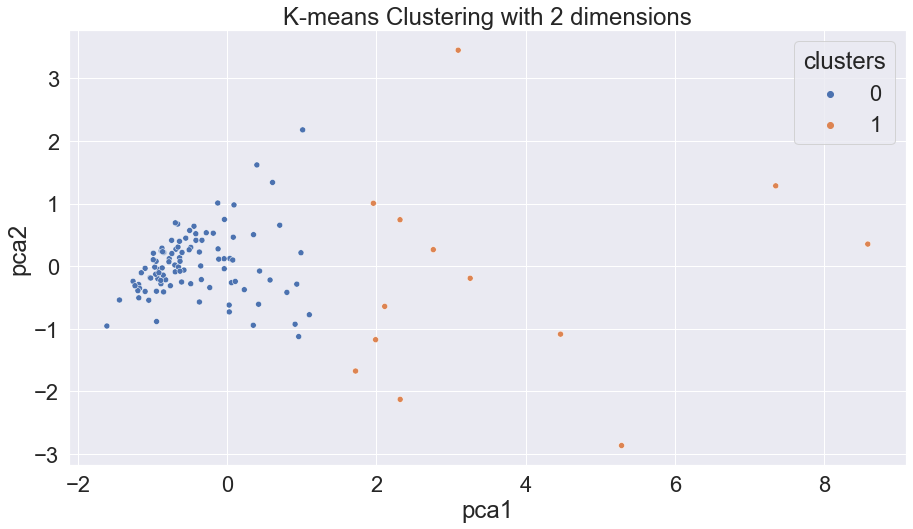

In [61]:
sns.set(rc = {'figure.figsize':(15,8)},font_scale=2)
sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

There are no distinguishable clusters.

# Conclusion

Several techniques were applied to perform initial exploration on the data including correlation heatmap,basic barplots for quantitive analysis as well as a more advanced data mining technique - clustering.A null hypothesis was formed for checking the significancy of the variables which was rejected by a  VIF score method applied on the features.This was important step towards the next phase-Data provisioning which resulted in creating two datasets - 'cancer2' derived from rejecting the null hypothesis by the VIF analysis and the 'joined' dataset,derived from the clustering analysis.

# Modelling

So far,the dataset has been analyzed and prepared for the current phase-Modelling.To choose what kind of model should be fitted,several aspects are taken into account.From analyzing the data in previous phases,it is clear this is a supervised problem since each instance is labelled.The target variable is in binary format representing 2 classes - 1 (class='diseased') and 0 (class='healthy').So therefore,algorithms which classifies the instances into those 2 classes should be fitted into the data.SVM classifier would be applicable.

### Pre-processing data and splitting it into train and test sets

The first step that should be performed is  is to scale the data so that each feature lies within the same range.This is already done from the previous section for the CLuster Analysis.In case of SVM,the distance between the points is measured and it is essential the data is scaled for accurate interpretation of the classifier.

In [62]:
y =cancer[['Classification_binary']]
print(y)
print(X_std)


     Classification_binary
0                        0
1                        0
2                        0
3                        0
4                        0
..                     ...
111                      1
112                      1
113                      1
114                      1
115                      1

[116 rows x 1 columns]
      Glucose   Insulin      HOMA  Resistin
0   -1.239222 -0.728739 -0.614282 -0.545517
1   -0.258299 -0.688038 -0.548240 -0.864214
2   -0.302887 -0.550073 -0.464752 -0.441660
3   -0.927110 -0.676965 -0.574210 -0.158867
4   -0.258299 -0.644743 -0.521081 -0.336352
..        ...       ...       ...       ...
111 -0.258299 -0.666590 -0.534786 -0.305255
112  0.098400 -0.546881 -0.435039 -0.600299
113 -0.035362 -0.427172 -0.365106 -0.356320
114 -0.704173 -0.717467 -0.585883 -0.928577
115  1.792721  0.987394  1.125766 -0.841036

[116 rows x 4 columns]


The train_test_split method is the most common way to split the data into two sets.The data is split into a training set which the model is fit into and a test set used for evaluating the model performance on an unseen data.

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,np.ravel(y), test_size = 0.25,random_state=4)


It would be helpful to check the class distributions,because if there are more observations of class 0 than there is of class 1 or vice versa the data will be considered as biased and therefore the classifier interpretation will not be reliable.The np.bincount() function will count the occurences of each value in the array (how many 0s and 1s are present in it.)

In [64]:
np.bincount(y_train)

array([37, 50], dtype=int64)

There is relatively good class balance in the training set.

### Support vector machine implementation

In this section,the choen model will be fitted into the data with default parameters.The model learns from the training data and makes predictions on the test data  with the goal to estimate how well the model generalises on  unseen data.

In [65]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

Retrieve predictions:

In [66]:
y_pred = classifier.predict(X_test)
dataset=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
values=pd.DataFrame(dataset)

### Model performance

An accuracy score will be used to check the overall score of the model by comparing the correctly predicted labels out of the total in the test set.

In [67]:
accuracy_score(y_pred,y_test)

0.8275862068965517

82% is almost completely aligned with the pre-defined goal of ~85 %.Although this is an acceptable result,there is still no clarity how the model is performing per class.This insight is essential since it might be possible that certain class has more weight than other/s.

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.85      0.79      0.81        14

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29



In [69]:
cm4 = confusion_matrix(y_pred, y_test)
print(cm4)

[[13  3]
 [ 2 11]]


The classification report goes along with the confusion matrix.The retrieved confusion matrix can be interpreted as follows:

As mentioned,there are 2 possible classes 0 (healthy) and 0 (diseased).The sum of all numbers is 29,that means that  the classifier made 29 predictions in total.The numbers 13 and 11 are the correctly predicted labels for each class whereas 2 and 3 are  the incorrectly predicted labels.If the array is interpreted column-wise,each column corresponds to a certain class.With that being mentioned,13 out of 15 patients were actually healthy and they were predicted as healthy and 2 were healthy,but classified as 'diseased'.Identical interpretation applies to class 1: Out of 14 diseased patients,11 were correctly classified as diseased and 3 were diseased,but classified as 'healthy'.The basic terms behind this explanation are the following:
* true positives (TP): These are cases in which it is  predicted 1  and the observations do belong to class 1.
* true negatives (TN): Predicted 0, and the observations do belong to class 0.
* false positives (FP):Predicted 1,but they belong to class 0. but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): Predicted 0,but they belong to class 1.

There are certain calculations that can be made using each of these terms retrieved from the confusion matrix for binary classifier and some of them  are also represented in the classification report:
* Accuracy: Overall, how often is the classifier correct? : (TP+TN)/total = (13+11)/29 = 0.83
* Misclassification Rate: Overall, how often is it wrong? : (FP+FN)/total = (3+2)/29 = 0.17; equivalent to 1 minus Accuracy and it is also known as "Error Rate"
 * True Positive Rate: When it's actually yes, how often does it predict yes? : TP/actual yes = 11/13 = 0.85 also known as "Sensitivity" or "Recall"
* False Positive Rate: When it's actually no, how often does it predict yes? : FP/actual no = 3/16 = 0.19
* True Negative Rate: When it's actually no, how often does it predict no? : TN/actual no = 11/16 = 0.68 ; equivalent to 1 minus False Positive Rate and also known as "Specificity"
* Precision: When it predicts yes, how often is it correct? : TP/predicted yes = 11/14 = 0.79

For this model,it is desired that the model has low false positive rate (it won't be nice to be told you  don't have cancer but in fact you do have).A FP rate of 0.19 is acceptable.




### Estimating model performance using k-fold cross validation

In the current case,the data size is not big enough which can result in producing a model that overfits the data (learning too much from the training data).To check for overfitting,cross-validation should be performed.
There are many cross-validation techniques,but the one which I will focus on in this notebook is called k-fold cross validation.The parameter that the KFold () function takes is n_splits which has to be carefully selected - it determines the number of folds the data will be split into.What happens after splitting the data into these folds is,part of the observations within each fold are used for testing the model,and the rest for training.The beneficial thing about this method is that each observation is included in a test set only once.The next question is - how to determine the k value  for the n_splits parameter?

### Sensitivity analysis of K

To choose the optimal k number,we need to test different k-values on the dataset.This can be achieved by using
 a leave-one-out cross-validation (LOOCV), a computationally expensive version of cross-validation where k=N, and N is the total number of examples in the training dataset. That is, each sample in the training set is given an example to be used alone as the test evaluation dataset and it can provide a good estimate of model performance given the available data.
We can then compare the mean classification accuracy for different k values to the mean classification accuracy from LOOCV on the same dataset. The difference between the scores provides a rough proxy for how well a k value approximates the ideal model evaluation test condition.

In [70]:
# evaluate the model using a given test condition
def evaluate_model(cv):
    scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    return scores.mean(), scores.min(), scores.max()

Ideal: 0.707
> folds=2, accuracy=0.612 (0.517,0.707)
> folds=3, accuracy=0.733 (0.692,0.789)
> folds=4, accuracy=0.733 (0.690,0.793)
> folds=5, accuracy=0.664 (0.565,0.783)
> folds=6, accuracy=0.707 (0.632,0.789)
> folds=7, accuracy=0.716 (0.588,0.824)
> folds=8, accuracy=0.724 (0.571,0.867)
> folds=9, accuracy=0.699 (0.538,0.769)
> folds=10, accuracy=0.733 (0.545,0.833)
> folds=11, accuracy=0.717 (0.455,0.909)
> folds=12, accuracy=0.707 (0.400,0.900)
> folds=13, accuracy=0.716 (0.444,0.889)
> folds=14, accuracy=0.699 (0.444,1.000)
> folds=15, accuracy=0.707 (0.375,0.875)
> folds=16, accuracy=0.706 (0.375,1.000)
> folds=17, accuracy=0.692 (0.429,1.000)
> folds=18, accuracy=0.700 (0.429,1.000)
> folds=19, accuracy=0.701 (0.429,1.000)
> folds=20, accuracy=0.710 (0.333,1.000)
> folds=21, accuracy=0.708 (0.333,1.000)
> folds=22, accuracy=0.708 (0.333,1.000)
> folds=23, accuracy=0.701 (0.333,1.000)
> folds=24, accuracy=0.700 (0.400,1.000)
> folds=25, accuracy=0.700 (0.400,1.000)
> folds=26,

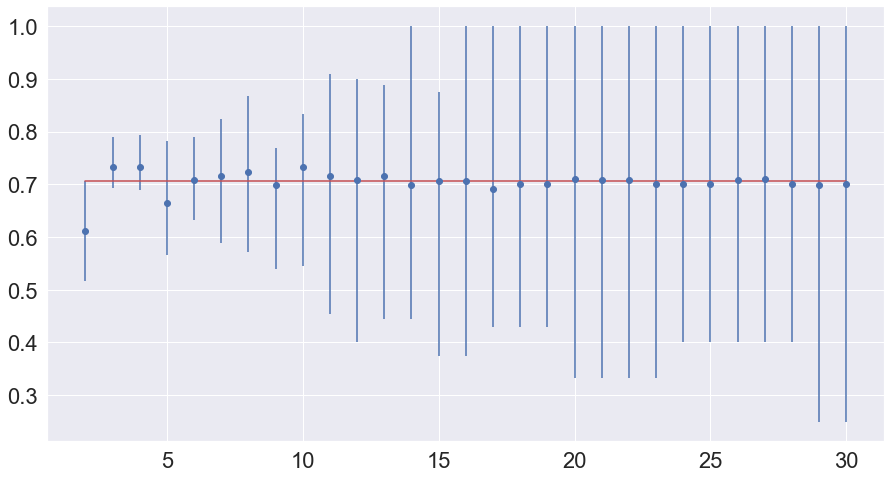

In [71]:
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# evaluate each k value
for k in folds:
# define the test condition
 cv = KFold(n_splits=k, shuffle=True, random_state=1)
 # evaluate k value
 k_mean, k_min, k_max = evaluate_model(cv)
 # report performance
 print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
 # store mean accuracy
 means.append(k_mean)
# store min and max relative to the mean
 mins.append(k_mean - k_min)
 maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

0.707 -> k=15.

In [72]:
kfold =KFold(n_splits=15)
#Model instance
#Evaluate model performance
scoring = 'accuracy'
results =cross_val_score(classifier,X_std,np.ravel(y), cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -val set: 63.81% (0.22)


It is noticeable that the accuracy score is significantly lower than the one retrieved  earlier from splitting the data using simple train_test_split.That's why it is important that the dataset is large enough.When a data is large enough it will be representative and  a good balance between bias and variance will be achieved.The below visualization will illustrate the training vs validation accuracy for different training sizes which will further prove the point that the data size is essential.The learning curve () function will be used to plot the training vs the validation accuracy using the kfold variable defined earlier as the cross-validation method passed to the cv parameter.

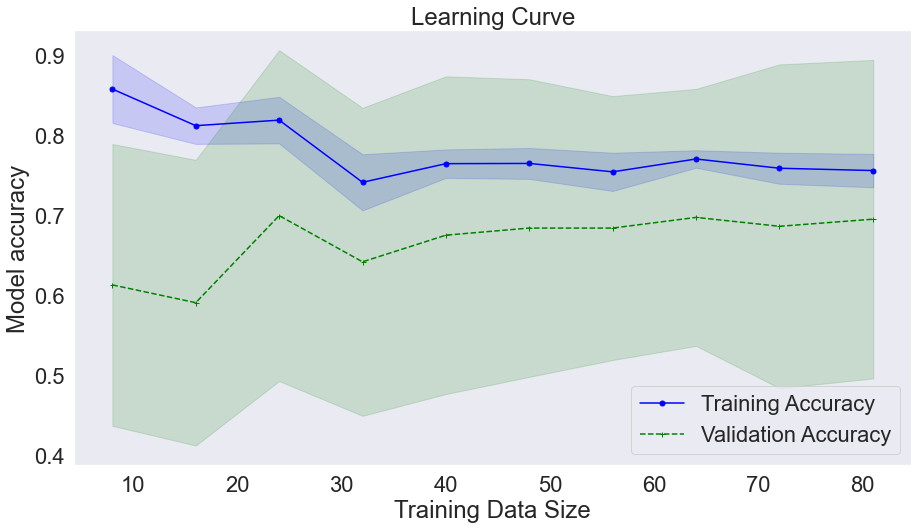

In [73]:
# Use learning curve to get training and test scores along with train sizes

train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(), X=X_train, y=y_train,
                                                       cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

From this visualization it can be noted that the for training sample size less than 25, the difference between training and validation accuracy is much larger. This is the case of overfitting.
For training size greater than 30, the model is better. It is a sign of good bias-variance trade-off.

### Conclusion from cross-validation

It can be seen that the model is overfitting which is confirmed from comparing the cross-validation.The goal is to  achieve a good bias-variance trade off after all.It can be seen from the above visualization that for larger training samples,the training and the validation accuracy are balanced which is the goal.The bottleneck here as already mentioned is that there is not enough data to use for training  and thus improving the model performance is not currently possible from this aspect.And if the n_splits of the cross-validation method increases,the error will increase as well.And we don't want to have any overlap in the training and testing folds that are retrieved from the KFold method.What can be done in this case is,tuning the parameters of the model so that is learns appropriately from the avaiable data.

### Cross-validation  further evaluation

Confusion matrix will still be used to evaluate the model from the cross validation.In this case,we need to retrieve the predictions made in each fold and compare them with the test labels also retrieved from every fold(of course there might be other ways to achieve the same)

The itterator below goes through each of the folds and appends the test and predicted values.This is possible since the kfold.split provides the test and train indexes.

In [74]:
X2=X_std.to_numpy()

In [75]:
y2=cancer['Classification_binary'].to_numpy()

In [76]:
for train_index, test_index in kfold.split(X2):
    print(train_index, test_index)

[  8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115] [0 1 2 3 4 5 6 7]
[  0   1   2   3   4   5   6   7  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115] [ 8  9 10 11 12 13 14 15]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  24  25
  26 

In [77]:
def evaluate_model(X2,y2):
    kfold =KFold(n_splits=15)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_index, test_index in kfold.split(X2):
        X_train2, X_test2, y_train2, y_test2 = X2[train_index],X2[test_index],y2[train_index],y2[test_index]

        # Fit the classifier
        classifier2 =SVC().fit(X_train2,y_train2)

        # Predict the labels of the test set samples
        predicted_labels = classifier2.predict(X_test2)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets,y_test2)

    return predicted_targets, actual_targets

In [78]:
predicted_target, actual_target = evaluate_model(X2,y2)
confusion_matrix(actual_target,predicted_target)

array([[31, 21],
       [21, 43]], dtype=int64)

In [79]:
print(classification_report(actual_target,predicted_target))

              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        52
         1.0       0.67      0.67      0.67        64

    accuracy                           0.64       116
   macro avg       0.63      0.63      0.63       116
weighted avg       0.64      0.64      0.64       116



Since we are interested in observing the False Positive rate,in this case it is 21/52 =0.4 but this is more realistic  and reliable score of the model skill.

### Hyperparameter tuning using Grid Search

Besides that cross-validation is extremely powerful in estimating the model skill,this method can be used as a parameter to the Grid Search.Grid search is a method that scans the data and search for optimal parameters for a given model.

In [80]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=kfold)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 15 folds for each of 75 candidates, totalling 1125 fits
[CV 1/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 6/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 7/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 8/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 9/15] END .......C=0.1, gamma=1, kernel=rbf;, score=0.333 total time=   0.0s
[CV 10/15] END ......C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 11/15] END ......C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 12/15] END ......C=0.1, gamma=1, kernel=r

[CV 5/15] END .C=0.1, gamma=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/15] END .C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/15] END .C=0.1, gamma=0.01, kernel=linear;, score=0.333 total time=   0.0s
[CV 8/15] END .C=0.1, gamma=0.01, kernel=linear;, score=0.167 total time=   0.0s
[CV 9/15] END .C=0.1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 10/15] END C=0.1, gamma=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 11/15] END C=0.1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 12/15] END C=0.1, gamma=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 13/15] END C=0.1, gamma=0.01, kernel=linear;, score=0.600 total time=   0.0s
[CV 14/15] END C=0.1, gamma=0.01, kernel=linear;, score=0.400 total time=   0.0s
[CV 15/15] END C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/15] END C=0.1, gamma=0.01, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/15] END C=0.1, gamma=0

[CV 5/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 6/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 7/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 8/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 9/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 10/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 11/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 12/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 13/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 14/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 15/15] END C=0.1, gamma=0.0001, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 1/15] END .........C=1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s


[CV 12/15] END .....C=1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 13/15] END .....C=1, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 14/15] END .....C=1, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 15/15] END .....C=1, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/15] END ...C=1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.0s
[CV 8/15] END ...C=1, gamma=0.01, kernel=linear;, score=0.167 total time=   0.0s
[CV 9/15] END ...C=1, gamma=

[CV 11/15] END C=1, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 12/15] END C=1, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 13/15] END C=1, gamma=0.0001, kernel=linear;, score=0.600 total time=   0.0s
[CV 14/15] END C=1, gamma=0.0001, kernel=linear;, score=0.400 total time=   0.0s
[CV 15/15] END C=1, gamma=0.0001, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 2/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 4/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 5/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 6/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 7/15] END C=1, gamma=0.0001, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 8/15] END C=1, gamma=0.0

[CV 3/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 6/15] END .....C=10, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 8/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.167 total time=   0.0s
[CV 9/15] END .....C=10, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 10/15] END ....C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 11/15] END ....C=10, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 12/15] END ....C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 13/15] END ....C=10, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 14/15] END ....C=10, gamma=0.01, kernel=rbf;, score=0.600 total time=   0.0s
[CV 15/15] END ....C=10, gam

[CV 1/15] END C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/15] END C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/15] END C=10, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/15] END C=10, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/15] END C=10, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/15] END C=10, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/15] END C=10, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 8/15] END C=10, gamma=0.0001, kernel=linear;, score=0.167 total time=   0.0s
[CV 9/15] END C=10, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 10/15] END C=10, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 11/15] END C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 12/15] END C=10, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 13/15] END C=10, gamm

[CV 3/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 4/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 5/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 6/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.833 total time=   0.0s
[CV 7/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 8/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.167 total time=   0.0s
[CV 9/15] END .C=100, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 10/15] END C=100, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 11/15] END C=100, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 12/15] END C=100, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 13/15] END C=100, gamma=0.1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 14/15] END C=100, gamma=0.1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 15/15] END C=100, gamma=

[CV 14/15] END .C=100, gamma=0.0001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 15/15] END .C=100, gamma=0.0001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/15] END C=100, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/15] END C=100, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/15] END C=100, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 4/15] END C=100, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 5/15] END C=100, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/15] END C=100, gamma=0.0001, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/15] END C=100, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 8/15] END C=100, gamma=0.0001, kernel=linear;, score=0.333 total time=   0.0s
[CV 9/15] END C=100, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 10/15] END C=100, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 11/15] END C=

[CV 14/15] END C=1000, gamma=0.1, kernel=linear;, score=0.400 total time=   0.0s
[CV 15/15] END C=1000, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.833 total time=   0.0s
[CV 2/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 4/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 5/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 6/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.833 total time=   0.0s
[CV 7/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.0s
[CV 8/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.167 total time=   0.0s
[CV 9/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 10/15] END C=1000, gamma=0.1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 11/15] END C=1000, gamm

[CV 14/15] END C=1000, gamma=0.001, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 15/15] END C=1000, gamma=0.001, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 1/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 6/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.333 total time=   0.0s
[CV 8/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.167 total time=   0.0s
[CV 9/15] END .C=1000, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 10/15] END C=1000, gamma=0.0001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 11/15] END C=1000,

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=3)

In [81]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=1, gamma=1, kernel='sigmoid')


Fitting the best estimated model from the Grid Search:

In [82]:
classifier0 = SVC(C=1, gamma=1,kernel='sigmoid')
classifier0.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='sigmoid')

In [83]:
y_grid_pred = classifier0.predict(X_test)
 
# print classification report
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.91      0.71      0.80        14

    accuracy                           0.83        29
   macro avg       0.84      0.82      0.82        29
weighted avg       0.84      0.83      0.83        29



In [84]:
accuracy_score(y_test,y_grid_pred)

0.8275862068965517

In [85]:
cm5 = confusion_matrix(y_grid_pred, y_test)
print(cm5)

[[14  4]
 [ 1 10]]


Still acceptable False Positive rate from the tuned model.

### Re-comparing the tuned model training and validation accuracy

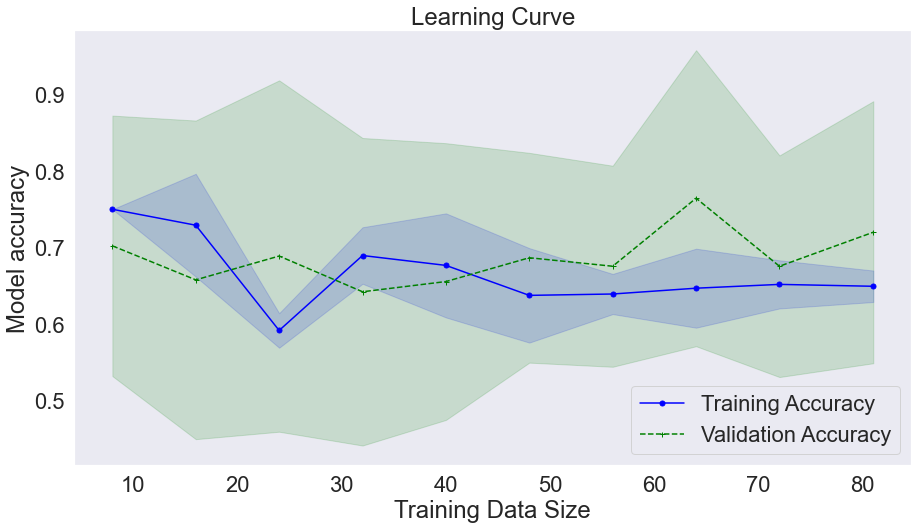

In [86]:
# Use learning curve to get training and test scores along with train sizes

train_sizes, train_scores, test_scores = learning_curve(estimator=SVC(C=1, gamma=1,kernel='sigmoid'), X=X_train, y=y_train,
                                                       cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Comparing individual accuracy scores of the validation and training sets is not always enough.By re-computing the learning curve for this graph we can observe if after tuning the hyper-parameters of the model,the overfitting is minimized.Looking at  the lines of the graph,I would say this is the perfect scenario - it is obvious that with these set of hyper-parameters,the model doesn't overfit the data that much.

# Conclusion

In the phase 'Modelling',first we started with building a simple SVM classifier and test its accuracy.Although the model gave high accuracy and acceptable confusion matrix,this is still not enough to draw the final conclusion that this model has to be selected.Therefore,a cross-validation was executed with pre-defined value of k.Via this method,the model was run  on each fold and its performance across each of those folds was computed and evaluated via confusion matrix.It showed that the False Positive Rate in fact is much higher.Afterwards,the resulted cross-validation was passed as parameter to the GridSearch to obtain the best estimated model with the goal to see if the overfitting is reduced.Overall,further training was needed to fit a model on such limited data sample but at the end,the overfitting was reduced and the False Positive rate is acceptable.